## Proyecto

Alumno: Carlos Adrián Alarcón

In [54]:
### Cargar librerías

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

In [8]:
### Cargar dataset

data = pd.read_csv("dataset.csv") ### Cambiar path de acuerdo a la ubicación del archivo
data.head()

,season,weekday,weathersit,temp,atemp,hum,windspeed,cnt,time_of_day
0,Winter,6,Clear,3.28,3.0014,0.81,0.0,16,Night
1,Winter,6,Clear,2.34,1.9982,0.80,0.0,40,Night
2,Winter,6,Clear,2.34,1.9982,0.80,0.0,32,Night
3,Winter,6,Clear,3.28,3.0014,0.75,0.0,13,Night
4,Winter,6,Clear,3.28,3.0014,0.75,0.0,1,Night


### Perfilamiento de datos

In [15]:
### Número de filas y columnas

print(data.shape)

(17379, 9)


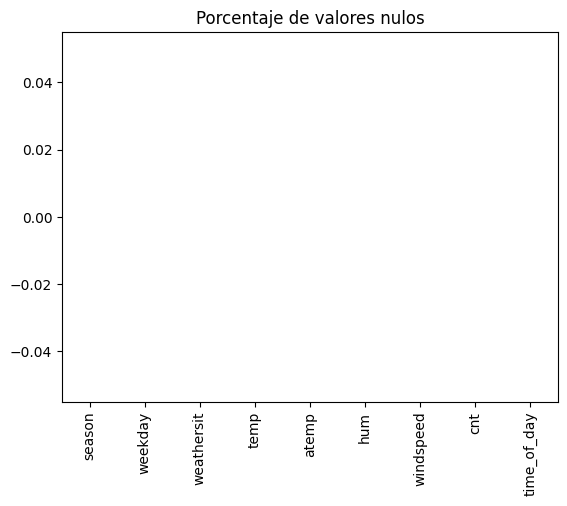

In [13]:
### Buscar valores nulos

data.isnull().mean().plot(kind='bar')
plt.title("Porcentaje de valores nulos")
plt.show()

In [36]:
### Análisis de valores únicos

print(data["season"].unique())
print(data["weekday"].unique())
print(data["weathersit"].unique())

print(data["time_of_day"].unique())

['Winter' 'Spring' 'Summer' 'Fall']
[6 0 1 2 3 4 5]
['Clear' 'Mist' 'Light Rain' 'Heavy Rain']
['Night' 'Morning' 'Evening']


In [16]:
### Estadísticas exploratorias

data.describe()

,weekday,temp,atemp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,3.003683,15.358397,15.401157,0.627229,12.736540,189.463088
std,2.005771,9.050138,11.342114,0.192930,8.196795,181.387599
min,0.000000,-7.060000,-16.000000,0.000000,0.000000,1.000000
25%,1.000000,7.980000,5.997800,0.480000,7.001500,40.000000
50%,3.000000,15.500000,15.996800,0.630000,12.998000,142.000000
75%,5.000000,23.020000,24.999200,0.780000,16.997900,281.000000
max,6.000000,39.000000,50.000000,1.000000,56.996900,977.000000


In [20]:
### Analizar valores duplicados

print(data.duplicated().sum())

42


In [23]:
### Eliminar valores duplicados

data = data.drop_duplicates()
# Nuevo shape
print(data.shape)

(17337, 9)


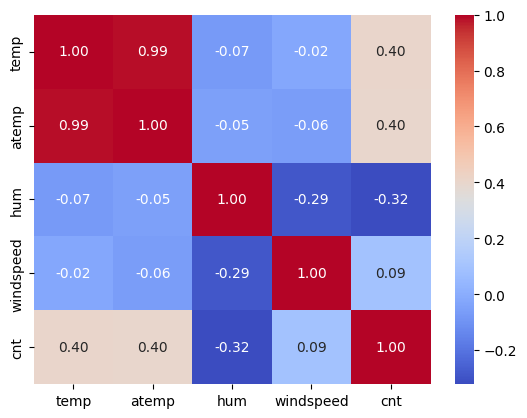

In [53]:
### Análisis de correlación

variables_numericas = ["temp", "atemp", "hum", "windspeed","cnt"]
correlacion = data[variables_numericas].corr()
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


<Axes: xlabel='cnt', ylabel='Count'>

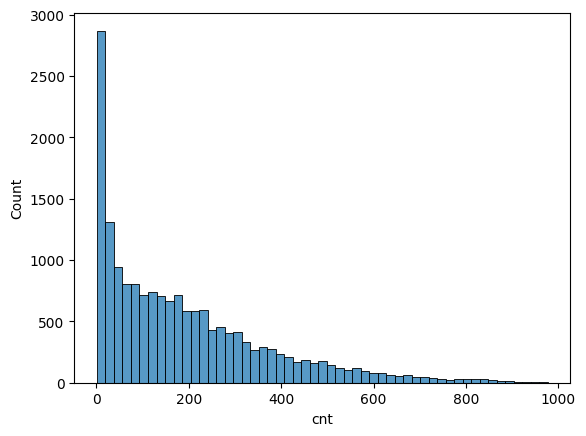

In [41]:
### Distribución de la variable objetivo

sns.histplot(data["cnt"])

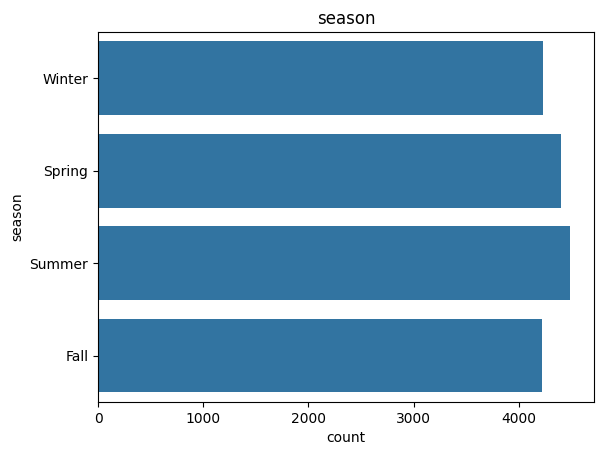

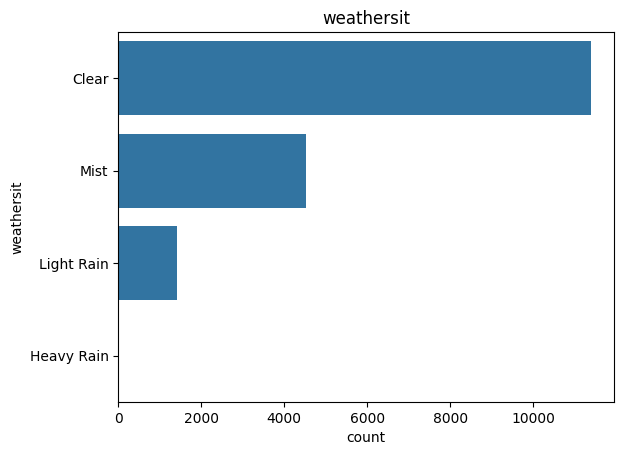

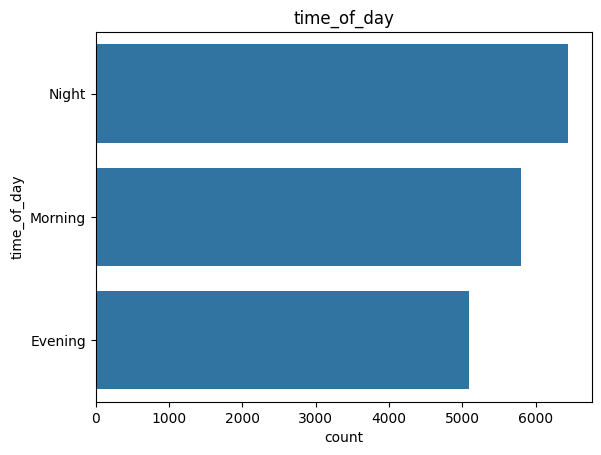

In [44]:
### Distribución de las variables categóricas

variables_categoricas = ["season", "weathersit", "time_of_day"]  
for var in variables_categoricas:
    sns.countplot(data[var])
    plt.title(var)
    plt.show()

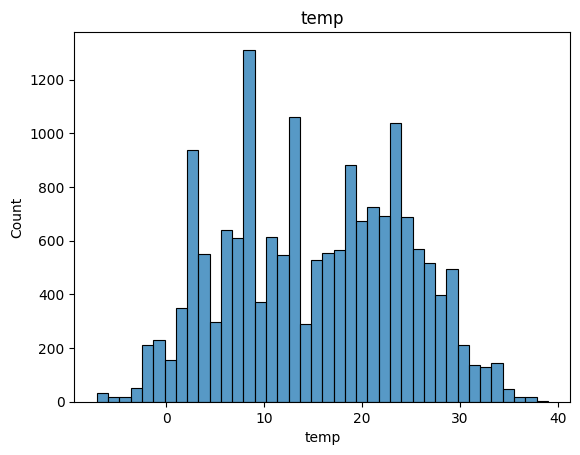

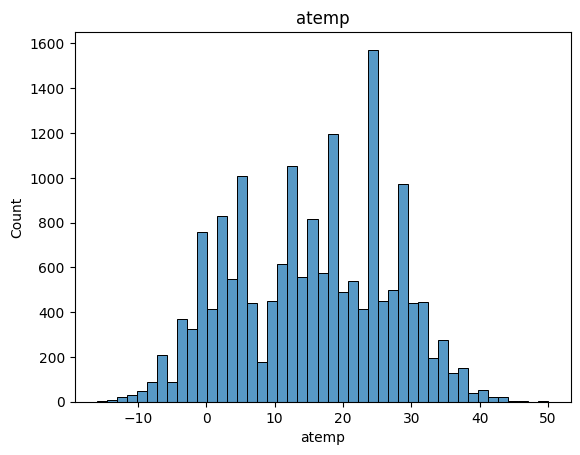

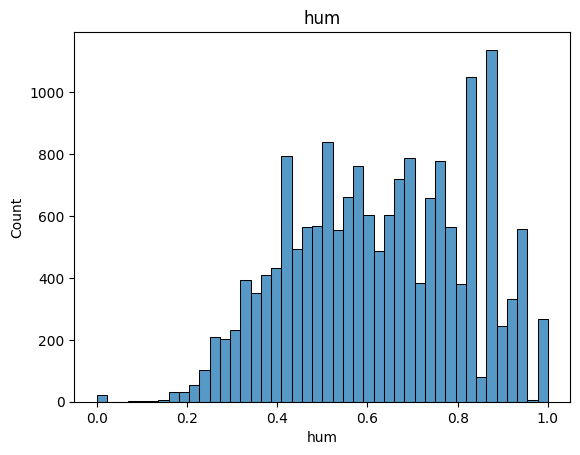

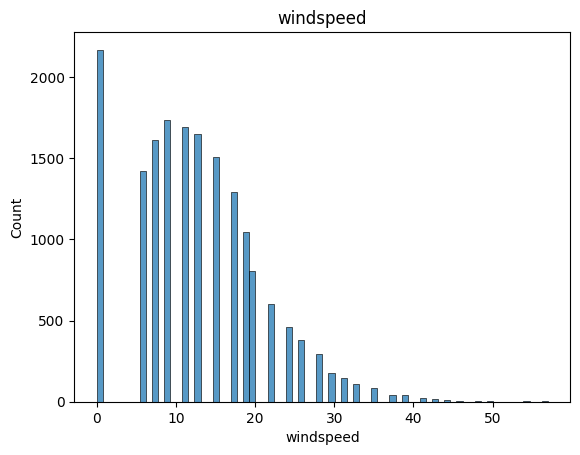

In [48]:
### Distribución de los predictores numéricos
predictores_numericos = ["temp", "atemp", "hum", "windspeed"]
for var in predictores_numericos:
    sns.histplot(data[var])
    plt.title(var)
    plt.show()

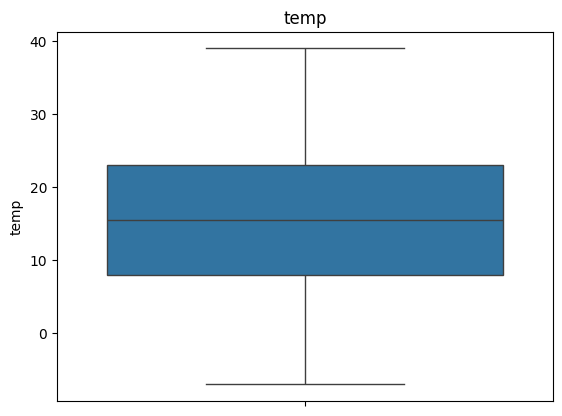

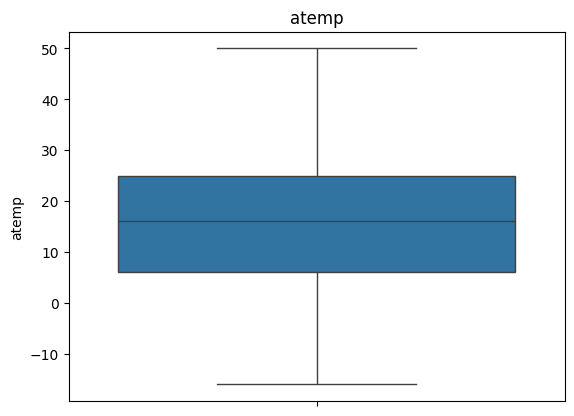

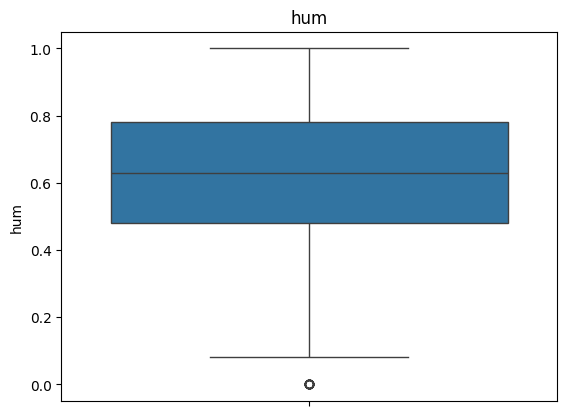

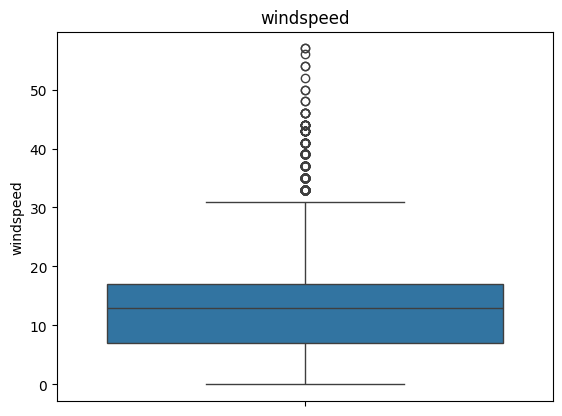

In [50]:
### Analizando outliers

for var in predictores_numericos:
    sns.boxplot(data[var])
    plt.title(var)
    plt.show()

### Modelamiento

In [58]:
x = data.drop(columns=["cnt"])
y = data["cnt"]

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=77)
print(x_train.shape)
print(x_test.shape)

(13869, 8)
(3468, 8)


In [ ]:
### Pipeline

